In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import math
from scipy.stats import pearsonr
import os

warnings.filterwarnings('ignore')

In [2]:
path = "C:\SMU Term 3\Applied Machine Learning\Project\csv" #edit this path to change to your path folder

household = pd.read_csv("".join([path,'/hhpub.csv']))
person =  pd.read_csv("".join([path,'/perpub.csv']))
veh =  pd.read_csv("".join([path,'/vehpub.csv']))
trip =  pd.read_csv("".join([path,'/trippub.csv']))


#person = pd.read_csv('/Users/jayneteo/Dropbox/SMU MITB/Term 2 2021/AML/Project/NHTS/csv/perpub.csv')
#veh = pd.read_csv('/Users/jayneteo/Dropbox/SMU MITB/Term 2 2021/AML/Project/NHTS/csv/vehpub.csv')
#trip= pd.read_csv('/Users/jayneteo/Dropbox/SMU MITB/Term 2 2021/AML/Project/NHTS/csv/trippub.csv')




In [3]:
#define function 

def cat_col_prop(data, col):
    print(pd.concat([data[col].value_counts(),
          data[col].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage')))

    sns.countplot(data[col], order =  data[col].value_counts().index)

## 1. Household

In [4]:
# as only studying hh with car will also filter out hh with HHVEHCNT == 0
ny = household[household['HHSTATE'] =="NY"]
# ny = ny[ny['HHVEHCNT']>0]

In [5]:
#15636 households in NY with at least one vehicle
ny.shape

(17178, 58)

In [6]:
ny.columns

Index(['HOUSEID', 'TRAVDAY', 'SAMPSTRAT', 'HOMEOWN', 'HHSIZE', 'HHVEHCNT',
       'HHFAMINC', 'PC', 'SPHONE', 'TAB', 'WALK', 'BIKE', 'CAR', 'TAXI', 'BUS',
       'TRAIN', 'PARA', 'PRICE', 'PLACE', 'WALK2SAVE', 'BIKE2SAVE', 'PTRANS',
       'HHRELATD', 'DRVRCNT', 'CNTTDHH', 'HHSTATE', 'HHSTFIPS', 'NUMADLT',
       'YOUNGCHILD', 'WRKCOUNT', 'TDAYDATE', 'HHRESP', 'LIF_CYC', 'MSACAT',
       'MSASIZE', 'RAIL', 'URBAN', 'URBANSIZE', 'URBRUR', 'SCRESP', 'CENSUS_D',
       'CENSUS_R', 'CDIVMSAR', 'HH_RACE', 'HH_HISP', 'HH_CBSA', 'RESP_CNT',
       'WEBUSE17', 'SMPLSRCE', 'WTHHFIN', 'HBHUR', 'HTHTNRNT', 'HTPPOPDN',
       'HTRESDN', 'HTEEMPDN', 'HBHTNRNT', 'HBPPOPDN', 'HBRESDN'],
      dtype='object')

min value: 0 should keep these values too 1744 occurences of total 17178 ( 10.152520665968098 %)


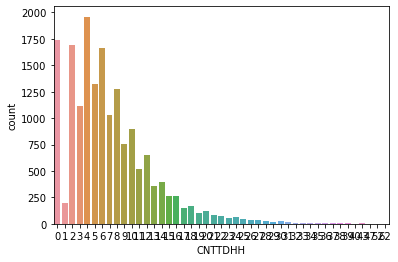

In [7]:
# label - cause of the zero values may not be able to log
sns.countplot(ny['CNTTDHH'])
print("min value:",str(min(ny['CNTTDHH'])),"should keep these values too",str(sum(ny['CNTTDHH']==0)), "occurences of total", len(ny), "(", str(sum(ny['CNTTDHH']==0)/len(ny)*100),"%)" )


### MSACAT

   counts  percentage
3    7421   43.200605
1    5142   29.933636
4    2807   16.340668
2    1808   10.525090


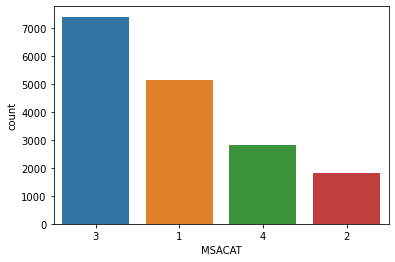

In [8]:
#Metropolitan Statistical Area (MSA) category for the household's home address
#majority are in MSA = 3 >> MSA less than 1 million based on household's home


ny['MSACAT'].value_counts()

cat_col_prop(ny,'MSACAT')


   counts  percentage
5    5142   29.933636
1    4371   25.445337
6    2807   16.340668
3    2270   13.214577
4    1808   10.525090
2     780    4.540692


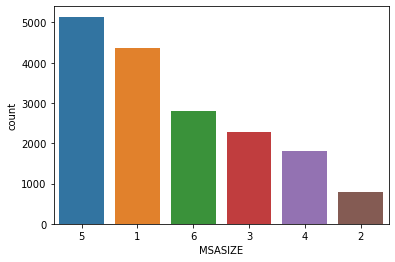

In [9]:
#Population size category of the Metropolitan Statistical Area (MSA), from the 2010-2014 five-year American Community Survey (ACS) API.

#05= In an MSA or CMSA of 3 million or more

ny['MSASIZE'].value_counts()

cat_col_prop(ny,'MSASIZE')

    counts  percentage
23    6933   44.339985
21    4380   28.012279
24    2634   16.845741
22    1680   10.744436
51       3    0.019186
13       2    0.012791
33       1    0.006395
52       1    0.006395
54       1    0.006395
31       1    0.006395


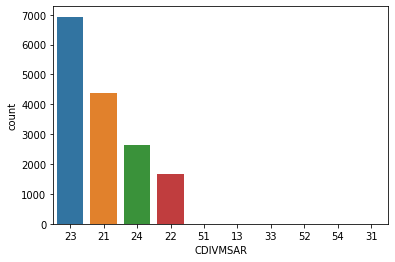

In [10]:
#Grouping of household by 2 combination of census division, MSA status, 
#and presence of a subway system when population greater than 1 million

#23=Mid-Atlantic (NY, NJ, PA) MSA of less than 1 million
#21=Mid-Atlantic (NY, NJ, PA) MSA or CMSA of 1 million or more with heavy rail
#24=Mid-Atlantic (NY, NJ, PA) Not in a MSA
#22=Mid-Atlantic (NY, NJ, PA) MSA or CMSA of 1 million or more without heavy rail

ny['CDIVMSAR'].value_counts()

cat_col_prop(ny,'CDIVMSAR')

    counts  percentage
23    7418   43.205778
21    5138   29.926029
24    2806   16.343410
22    1807   10.524783


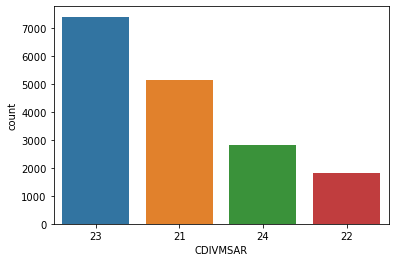

In [10]:
ny = ny[ny['CDIVMSAR'].isin([21,22,23,24])]
ny['CDIVMSAR'].value_counts()
cat_col_prop(ny,'CDIVMSAR')

### Core Based Statistical Area FIPS code

       counts  percentage
XXXXX   10224   59.549187
35620    5138   29.926029
40380     962    5.603122
15380     845    4.921661


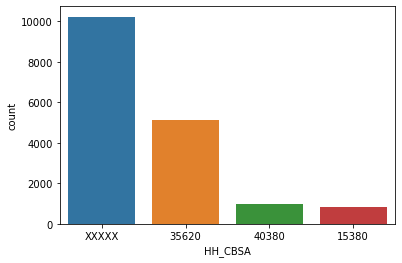

In [11]:
#Core Based Statistical Area (CBSA) FIPS code for the respondent's home address

ny['HH_CBSA'].value_counts()

cat_col_prop(ny,'HH_CBSA')

# significant number of households under the 'XXXXX=Suppressed, in an MSA of less than 1 million ' category

In [12]:
ny.head()

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
2,30000012,5,3,1,1,2,10,1,1,3,...,2,79.419586,C,80,17000,17000,5000,60,17000,7000
8,30000082,3,3,2,4,2,8,1,1,5,...,2,1148.809332,T,20,1500,300,750,30,750,300
15,30000130,1,1,1,2,1,5,-9,1,-9,...,1,3829.959655,U,60,30000,17000,5000,70,30000,17000
39,30000380,2,3,2,3,1,3,1,1,2,...,2,370.744472,S,50,3000,1500,1500,50,3000,1500
44,30000434,7,3,1,2,2,8,1,1,3,...,2,101.472420,R,30,1500,750,750,30,750,300


### Travel Dayof Week Lower

   counts  percentage
5    2510   14.619372
2    2483   14.462112
7    2467   14.368921
1    2463   14.345623
6    2452   14.281554
3    2406   14.013629
4    2388   13.908789


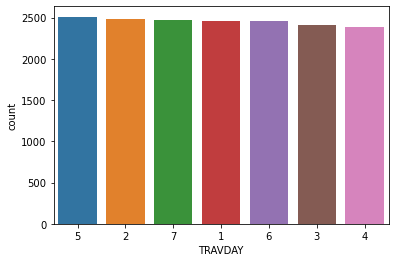

In [13]:
#relatively equal number of days of the week
ny['TRAVDAY'].value_counts()

cat_col_prop(ny,'TRAVDAY')

### Home ownership

           counts  percentage
HOME_OWN    13109   76.352729
HOME_RENT    3930   22.890093
NA            130    0.757179


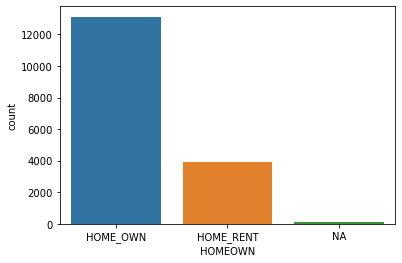

In [15]:
# Majority Own home while 17 percent rent the rest to replace with 'NA' (to remove while one hot encoding)

cat_col_prop(ny,'HOMEOWN')

ny['HOMEOWN'] = ny['HOMEOWN'].replace({1:"HOME_OWN",
                                       2: "HOME_RENT",
                                      97: "NA",
                                      -7: "NA"})

           counts  percentage
HOME_OWN    13109   76.352729
HOME_RENT    3930   22.890093
NA            130    0.757179


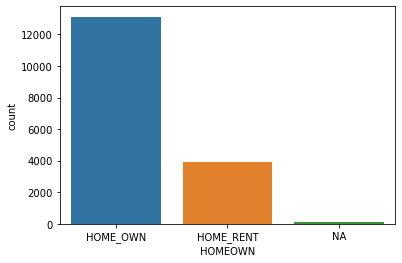

In [16]:
cat_col_prop(ny,'HOMEOWN')

### HHVEHCTN

    counts  percentage
2     6329   36.862951
1     5817   33.880832
3     2257   13.145786
0     1542    8.981304
4      795    4.630439
5      281    1.636671
6       92    0.535849
7       34    0.198031
8       12    0.069893
9        6    0.034947
12       2    0.011649
11       2    0.011649
________
new HHVEHCNT
    counts  percentage
2     6329   36.862951
1     5817   33.880832
>2    3481   20.274914
0     1542    8.981304


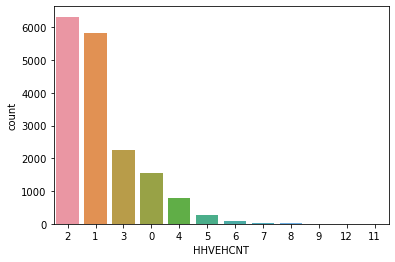

In [17]:
#count of household vehicles

cat_col_prop(ny,'HHVEHCNT')

ny['HHVEHCNT'][ny['HHVEHCNT']>2] = ">2"

print("________")
print("new HHVEHCNT")
print(pd.concat([ny['HHVEHCNT'].value_counts(),
          ny['HHVEHCNT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
    )

### HHFAMINC

     counts  percentage
 6     2974   17.321917
 7     2260   13.163259
 5     1981   11.538238
 8     1711    9.965636
 4     1582    9.214282
 3     1474    8.585241
 9      980    5.707962
 11     966    5.626420
 10     909    5.294426
 2      859    5.003203
 1      827    4.816821
-7      525    3.057837
-8      119    0.693110
-9        2    0.011649


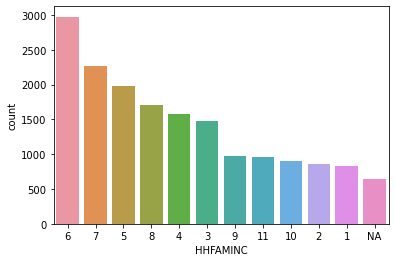

In [18]:
# Household family income 
# Group all negative as 'NA'

print(pd.concat([ny['HHFAMINC'].value_counts(),
          ny['HHFAMINC'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

ny['HHFAMINC'][ny['HHFAMINC'].isin([-9,-8,-7])]  = "NA"

sns.countplot(data = ny, x= 'HHFAMINC', order = ny['HHFAMINC'].value_counts().index)

### DRVRCNT

          counts  percentage
1.000000   12084   70.382666
0.500000    1830   10.658745
0.000000    1072    6.243812
0.666667    1018    5.929291
0.333333     291    1.694915
0.750000     269    1.566777
0.400000     261    1.520182
0.600000      95    0.553323
0.250000      80    0.465956
0.800000      60    0.349467
0.200000      29    0.168909
0.428571      14    0.081542
0.285714      14    0.081542
0.166667      11    0.064069
0.833333       9    0.052420
0.571429       7    0.040771
0.142857       5    0.029122
0.375000       5    0.029122
0.222222       3    0.017473
0.714286       3    0.017473
0.300000       2    0.011649
0.125000       1    0.005824
0.555556       1    0.005824
0.111111       1    0.005824
0.625000       1    0.005824
0.272727       1    0.005824
0.700000       1    0.005824
0.857143       1    0.005824


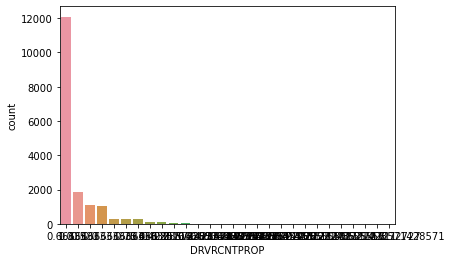

In [19]:
ny['DRVRCNTPROP'] = ny['DRVRCNT']/ny['HHSIZE']
cat_col_prop(ny,'DRVRCNTPROP')

Pearson Corelation of:  0.8130289404178634 between DRVRCNT and NUMADLT. May remove one is too many variables


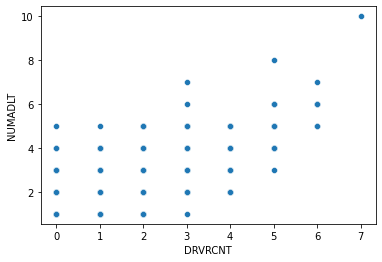

In [20]:
#number of drivers in the household 

corr,_ = pearsonr(ny['DRVRCNT'],ny['NUMADLT'])
print("Pearson Corelation of: ",str(corr), "between DRVRCNT and NUMADLT. May remove one is too many variables")

sns.scatterplot(x = ny['DRVRCNT'], y = ny['NUMADLT'])


   counts  percentage
2    8265   48.139088
1    6269   36.513484
3    1194    6.954395
0    1072    6.243812
4     317    1.846351
5      44    0.256276
6       7    0.040771
7       1    0.005824
_______________________
new value counts for DRVRCNT
    counts  percentage
2     8265   48.139088
1     6269   36.513484
>2    1563    9.103617
0     1072    6.243812


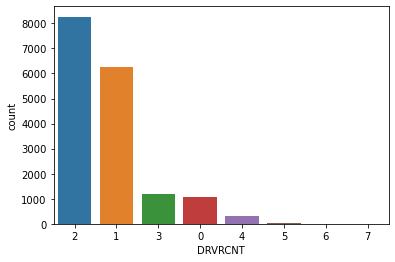

In [21]:
cat_col_prop(ny,'DRVRCNT')

# will bin those with >2 drivers together
ny['DRVRCNT'][ny['DRVRCNT']>2] = ">2"

print("_______________________")
print("new value counts for DRVRCNT")

print(pd.concat([ny['DRVRCNT'].value_counts(),
          ny['DRVRCNT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

    counts  percentage
2     8265   48.139088
1     6269   36.513484
>2    1563    9.103617
0     1072    6.243812


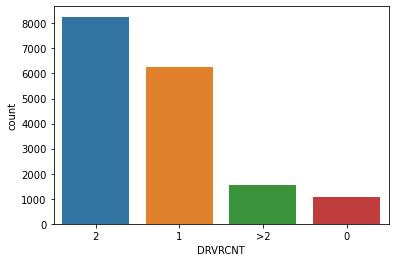

In [22]:
cat_col_prop(ny,'DRVRCNT')

In [23]:
# interestingly got 0.3% (56) of the household got 0 drivers but have cars 
ny[ny['DRVRCNT']==0].describe() 

,HOUSEID,TRAVDAY,SAMPSTRAT,HHSIZE,PC,SPHONE,TAB,WALK,BIKE,CAR,...,SMPLSRCE,WTHHFIN,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,DRVRCNTPROP
count,1.072000e+03,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,...,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.0
mean,3.527036e+07,4.068097,2.181903,1.404851,2.128731,2.066231,2.472948,0.817164,1.890858,3.286381,...,1.851679,1137.965760,50.791045,12111.075560,8966.112873,2693.654851,53.048507,12807.717351,9474.788246,0.0
std,5.068548e+06,1.983600,1.126677,0.929993,3.545389,3.823401,4.249591,3.686623,5.432914,2.323726,...,0.355584,1362.722438,24.911556,12119.415446,11204.500906,2049.139217,26.277011,12082.567351,11205.669244,0.0
min,3.000105e+07,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-1.000000,...,1.000000,15.259318,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.0
25%,3.028534e+07,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,2.000000,127.942263,30.000000,1500.000000,750.000000,750.000000,30.000000,1500.000000,750.000000,0.0
50%,3.055268e+07,4.000000,2.000000,1.000000,2.000000,2.000000,5.000000,1.000000,5.000000,5.000000,...,2.000000,411.513027,50.000000,7000.000000,3000.000000,3000.000000,50.000000,7000.000000,3000.000000,0.0
75%,4.041226e+07,6.000000,3.000000,1.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,...,2.000000,1915.413022,70.000000,30000.000000,17000.000000,5000.000000,70.000000,30000.000000,17000.000000,0.0
max,4.079220e+07,7.000000,4.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,3863.472603,95.000000,30000.000000,30000.000000,5000.000000,95.000000,30000.000000,30000.000000,0.0


In [24]:
print(pd.concat([ny['DRVRCNT'].value_counts(),
          ny['DRVRCNT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

    counts  percentage
2     8265   48.139088
1     6269   36.513484
>2    1563    9.103617
0     1072    6.243812


### PROPORTION OF NUMADLT / YOUNGCHILD / WRKCOUNT IN A HOUSEHOLD

    counts  percentage
2     9209   53.637370
1     6149   35.814549
3     1374    8.002796
4      358    2.085153
5       67    0.390238
6        8    0.046596
7        2    0.011649
10       1    0.005824
8        1    0.005824
      counts  percentage
1      14092   82.078164
>0.5    2525   14.706739
<0.5     552    3.215097


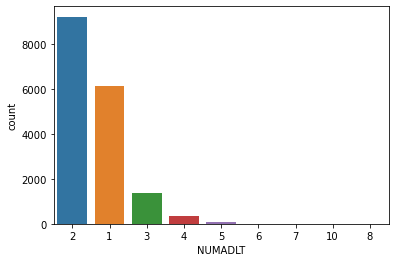

In [25]:
#Proportion of adults in a family 

cat_col_prop(ny,'NUMADLT')

ny['NUMADLT'] = ny['NUMADLT']/ny['HHSIZE']

#Bin into groups
ny['NUMADLT_ratio'] = 'NA'

ny.loc[ny['NUMADLT']==0,'NUMADLT_ratio']= '0'
ny.loc[ny['NUMADLT'].between(0,0.5,inclusive = False),'NUMADLT_ratio'] = '<0.5'
ny.loc[ny['NUMADLT'].between(0.5,1, inclusive = True),'NUMADLT_ratio'] = '>0.5'
ny.loc[ny['NUMADLT']==1,'NUMADLT_ratio'] ='1'
 


print(pd.concat([ny['NUMADLT_ratio'].value_counts(),
          ny['NUMADLT_ratio'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

#about 80% of families comprises of adults 

   counts  percentage
0    6278   36.565904
1    5781   33.671151
2    4351   25.342186
3     602    3.506320
4     143    0.832896
5      12    0.069893
7       1    0.005824
6       1    0.005824
      counts  percentage
0       6278   36.565904
1       5299   30.863766
>0.5    4125   24.025861
<0.5    1467    8.544470


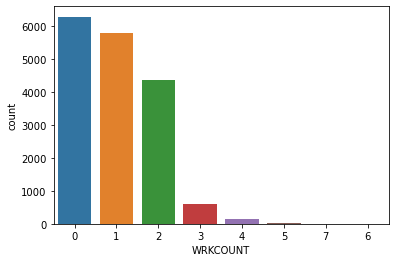

In [26]:
#Proportion of workers in the household 
#0 makes up nearly 34% - meaning they are all retired?

cat_col_prop(ny,'WRKCOUNT')

ny['WRKCOUNT'] = ny['WRKCOUNT']/ny['HHSIZE']


#Bin to groups
ny['WRKCOUNT_ratio'] = 'NA'
ny.loc[ny['WRKCOUNT']==0,'WRKCOUNT_ratio']= '0'
ny.loc[ny['WRKCOUNT'].between(0,0.5,inclusive = False),'WRKCOUNT_ratio'] = '<0.5'
ny.loc[ny['WRKCOUNT'].between(0.5,1, inclusive = True),'WRKCOUNT_ratio'] = '>0.5'
ny.loc[ny['WRKCOUNT']==1,'WRKCOUNT_ratio'] ='1'
 


print(pd.concat([ny['WRKCOUNT_ratio'].value_counts(),
          ny['WRKCOUNT_ratio'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )


   counts  percentage
0   16085   93.686295
1     789    4.595492
2     267    1.555128
3      26    0.151436
5       1    0.005824
4       1    0.005824
      counts  percentage
0      16085   93.686295
<0.5     857    4.991555
>0.5     227    1.322150


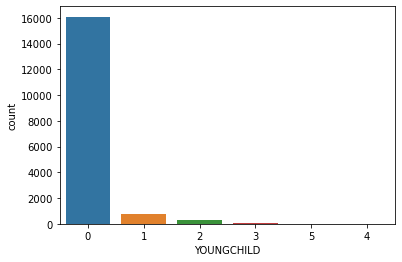

In [27]:
#proportion of family with children

cat_col_prop(ny,'YOUNGCHILD')

ny['YOUNGCHILD'] = ny['YOUNGCHILD']/ny['HHSIZE']


#Bin to groups
ny['YOUNGCHILD_ratio'] = 'NA'
ny.loc[ny['YOUNGCHILD']==0,'YOUNGCHILD_ratio']= '0'
ny.loc[ny['YOUNGCHILD'].between(0,0.5,inclusive = False),'YOUNGCHILD_ratio'] = '<0.5'
ny.loc[ny['YOUNGCHILD'].between(0.5,1, inclusive = True),'YOUNGCHILD_ratio'] = '>0.5'
ny.loc[ny['YOUNGCHILD']==1,'YOUNGCHILD_ratio'] ='1'
 


print(pd.concat([ny['YOUNGCHILD_ratio'].value_counts(),
          ny['YOUNGCHILD_ratio'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )


    counts  percentage
10    4294   25.010193
2     3576   20.828237
1     3118   18.160638
9     2648   15.423146
6     1252    7.292213
4     1126    6.558332
8      621    3.616984
5      267    1.555128
7      156    0.908614
3      111    0.646514


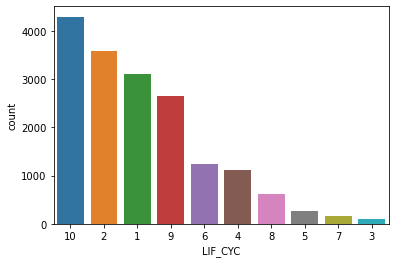

In [28]:
#Life Cycle classification for the C 2 household, derived by attributes pertaining to age, relationship, and work status.

#10=2+ adults, retired, no children
#02=2+ adults, no children
#01=one adult, no children
#09=one adult, retired, no children

cat_col_prop(ny,'LIF_CYC')

### HHSIZE

    counts  percentage
2     7215   42.023414
1     5766   33.583785
3     2062   12.010018
4     1434    8.352263
5      484    2.819034
6      128    0.745530
7       47    0.273749
8       19    0.110665
9        8    0.046596
10       5    0.029122
11       1    0.005824
________
new HHSIZE
    counts  percentage
2     7215   42.023414
1     5766   33.583785
>3    2126   12.382783
3     2062   12.010018


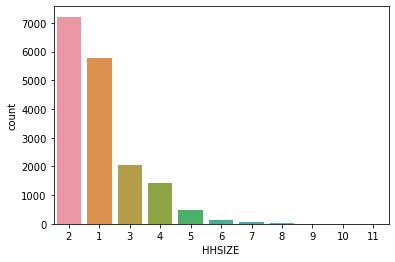

In [29]:
#count of household members

cat_col_prop(ny,'HHSIZE')

# to bin tail HHSIZE

ny['HHSIZE'][ny['HHSIZE']>3] = ">3"

print("________")
print("new HHSIZE")
print(pd.concat([ny['HHSIZE'].value_counts(),
          ny['HHSIZE'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
    )

### URBAN/ URBBUR/ URBANSIZE

   counts  percentage
1   11812   68.798416
2    5357   31.201584


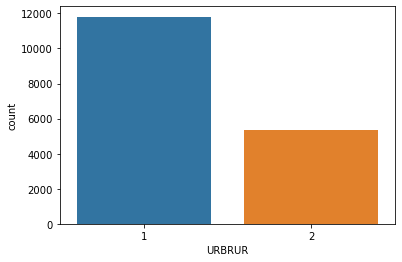

In [30]:
#house in urban / rural areas 

cat_col_prop(ny,'URBRUR')


   counts  percentage
6    7191   41.883627
5    3484   20.292387
1    2793   16.267692
3    2002   11.660551
2    1699    9.895742


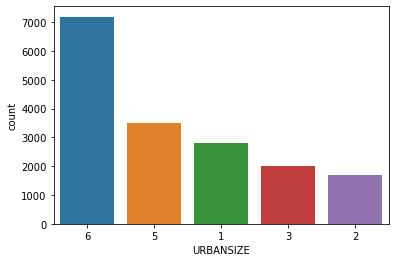

In [31]:
#06 = not in an urbanised area 
#05 - 1 million with heavy rail 


cat_col_prop(ny,'URBANSIZE')

In [32]:
# Final columns selected for HH

ny = ny[['HOUSEID','HH_CBSA','HOMEOWN','HHSIZE','HHVEHCNT','HHFAMINC','NUMADLT_ratio','YOUNGCHILD_ratio','WRKCOUNT_ratio','MSASIZE','URBAN','URBANSIZE','URBRUR','LIF_CYC']]


## 2. Trip

## key issue: Data leakage. 

1. Would be good if can somehow only get the driver trips only (remove duplicate passenger trips)

2. Should use like popular routes distances rather than the actual route info (e.g. think of what a new person if surveyed can answer on the spot) e.g. which route you frequent the most and how far is it

In [39]:
trip.head()

,HOUSEID,PERSONID,TDTRPNUM,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,30000007,1,1,1000,1015,15,5.244,3,0,0,...,20,750,300,50,750,300,350,30,300,300
1,30000007,1,2,1510,1530,20,5.149,3,0,0,...,30,300,300,50,1500,750,750,20,750,300
2,30000007,2,1,700,900,120,84.004,6,0,0,...,40,1500,750,50,1500,750,750,20,750,300
3,30000007,2,2,1800,2030,150,81.628,6,0,0,...,20,750,300,40,1500,750,750,40,1500,750
4,30000007,3,1,845,900,15,2.250,3,0,0,...,20,750,300,50,750,300,350,60,750,300


In [40]:
[c for c in trip.columns]

['HOUSEID',
 'PERSONID',
 'TDTRPNUM',
 'STRTTIME',
 'ENDTIME',
 'TRVLCMIN',
 'TRPMILES',
 'TRPTRANS',
 'TRPACCMP',
 'TRPHHACC',
 'VEHID',
 'TRWAITTM',
 'NUMTRANS',
 'TRACCTM',
 'DROP_PRK',
 'TREGRTM',
 'WHODROVE',
 'WHYFROM',
 'LOOP_TRIP',
 'TRPHHVEH',
 'HHMEMDRV',
 'HH_ONTD',
 'NONHHCNT',
 'NUMONTRP',
 'PSGR_FLG',
 'PUBTRANS',
 'TRIPPURP',
 'DWELTIME',
 'TDWKND',
 'VMT_MILE',
 'DRVR_FLG',
 'WHYTRP1S',
 'ONTD_P1',
 'ONTD_P2',
 'ONTD_P3',
 'ONTD_P4',
 'ONTD_P5',
 'ONTD_P6',
 'ONTD_P7',
 'ONTD_P8',
 'ONTD_P9',
 'ONTD_P10',
 'ONTD_P11',
 'ONTD_P12',
 'ONTD_P13',
 'TDCASEID',
 'TRACC_WLK',
 'TRACC_POV',
 'TRACC_BUS',
 'TRACC_CRL',
 'TRACC_SUB',
 'TRACC_OTH',
 'TREGR_WLK',
 'TREGR_POV',
 'TREGR_BUS',
 'TREGR_CRL',
 'TREGR_SUB',
 'TREGR_OTH',
 'WHYTO',
 'TRAVDAY',
 'HOMEOWN',
 'HHSIZE',
 'HHVEHCNT',
 'HHFAMINC',
 'DRVRCNT',
 'HHSTATE',
 'HHSTFIPS',
 'NUMADLT',
 'WRKCOUNT',
 'TDAYDATE',
 'HHRESP',
 'LIF_CYC',
 'MSACAT',
 'MSASIZE',
 'RAIL',
 'URBAN',
 'URBANSIZE',
 'URBRUR',
 'GASPRICE',
 'CE

In [41]:
# to get only tripcounts of the driver only

trip = trip[trip['PERSONID']==trip['WHODROVE']]

In [42]:
trip = trip[['HOUSEID','PERSONID','TRAVDAY','TRPMILES','TRPHHVEH','TRPTRANS','WHYTRP1S','WHYTRP90','TRVLCMIN',
'TRWAITTM']]
ny_trip = trip[trip['HOUSEID'].isin(ny['HOUSEID'])]

In [43]:
ny_trip.shape

(75486, 10)

In [38]:
sum(ny_trip['TRWAITTM']<0)/ny_trip.shape[0]

0.999761010130515

### Trip Transport

In [39]:
ny_trip['TRPTRANS'].value_counts()
# TO CHECK 8 - do we want to count motorbike/mopeds as vehicles???
ny_trip = ny_trip[ny_trip['TRPTRANS'].isin([3,4,5,6,8])]


,counts,percentages
6,11841,15.765508
5,11361,15.126420
4,11349,15.110442
3,11262,14.994608
2,11087,14.761607
7,9957,13.257087
1,8250,10.984329


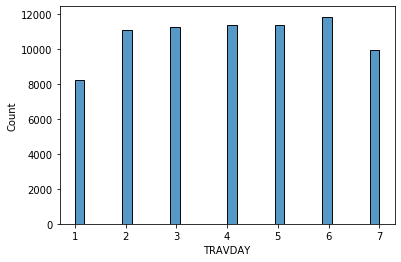

In [40]:
sns.histplot(ny_trip['TRAVDAY'])

pd.concat([ny_trip['TRAVDAY'].value_counts(),
           ny_trip['TRAVDAY'].value_counts(normalize = True).mul(100)],
          axis = 1, keys=('counts','percentages'))

## Why Trip

In [44]:
# since only 24 lines with trip distance <= 0, removed lines
print('# of trips with dist <=0,', str(sum(ny_trip['TRPMILES']<=0)),' out of', str(len(ny_trip)))

ny_trip = ny_trip[ny_trip['TRPMILES']>0]

# of trips with dist <=0, 21  out of 75486


In [42]:
purpose_summ = ny_trip.groupby(['HOUSEID','PERSONID','WHYTRP90']).agg(avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        mod  = ('TRPMILES', lambda x: x.value_counts().index[0])
                                           ).unstack().reset_index()

In [43]:
ny_trip.groupby(['HOUSEID','PERSONID','WHYTRP90']).agg(avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        mod  = ('TRPMILES', lambda x: x.value_counts().index[0]),
                                            skew = ('TRPMILES','skew'),
                                            count = ('TRPMILES','count')
                                           )

avg      med     mod      skew  count
HOUSEID  PERSONID WHYTRP90                                            
30000012 1        1          7.95250   7.9525   6.818       NaN      2
                  2          4.29100   4.2910   4.291       NaN      1
                  8         48.87900  48.8790  49.457       NaN      2
                  10         2.21575   2.2270   3.395 -0.000946      4
30000082 1        1          1.75200   1.7520   0.777       NaN      2
...                              ...      ...     ...       ...    ...
40793974 1        10         3.62175   3.6370   3.496 -0.073407      4
40794020 1        3          5.26600   5.2660   5.266       NaN      2
                  4          0.83600   0.8360   0.836       NaN      2
         2        3          5.30200   5.3020   5.302       NaN      1
                  6         18.71050  18.7105  22.182       NaN      2

[37619 rows x 5 columns]

In [44]:
ny_trip[['TRPMILES','HOUSEID','PERSONID']][ny_trip['WHYTRP90']==1].groupby(['HOUSEID','PERSONID']).agg(avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        mod  = ('TRPMILES', lambda x: x.value_counts().index[0])
                                           )

avg      med     mod
HOUSEID  PERSONID                          
30000012 1          7.9525   7.9525   6.818
30000082 1          1.7520   1.7520   0.777
30000380 2          1.1815   1.1815   1.191
30000436 1          1.2465   1.2465   0.678
30000439 4          0.0815   0.0815   0.082
...                    ...      ...     ...
40792484 1          2.5350   2.5350   2.535
40792552 1          9.6435   9.6435   9.771
         2         10.6285  10.6285  10.949
40793555 3          1.5440   1.5440   2.140
         4         20.2440  20.2440  20.688

[7708 rows x 3 columns]

In [45]:
purpose_summ

HOUSEID PERSONID     avg                                           \
WHYTRP90                          1       2         3       4   5          6   
0         30000012        1  7.9525   4.291       NaN     NaN NaN        NaN   
1         30000082        1  1.7520     NaN       NaN  1.8925 NaN        NaN   
2         30000082        2     NaN  45.341  2.136000     NaN NaN        NaN   
3         30000380        2  1.1815     NaN  1.896667     NaN NaN   2.206333   
4         30000434        1     NaN   0.168  0.333333     NaN NaN        NaN   
...            ...      ...     ...     ...       ...     ...  ..        ...   
19159     40793808        1     NaN     NaN       NaN     NaN NaN        NaN   
19160     40793808        2     NaN     NaN  3.048000  4.4740 NaN        NaN   
19161     40793974        1     NaN     NaN  6.609500     NaN NaN        NaN   
19162     40794020        1     NaN     NaN  5.266000  0.8360 NaN        NaN   
19163     40794020        2     NaN     NaN  5.302000     NaN NaN  18.710500   

                            ...    mod                                    \
WHYTRP90       8        10  ...      1       2      3      4   5       6   
0         48.879   2.21575  ...  6.818   4.291    NaN    NaN NaN     NaN   
1            NaN   1.43200  ...  0.777     NaN    NaN  1.075 NaN     NaN   
2            NaN  88.58100  ...    NaN  45.341  2.136    NaN NaN     NaN   
3            NaN       NaN  ...  1.191     NaN  0.713    NaN NaN   3.318   
4            NaN       NaN  ...    NaN   0.168  0.486    NaN NaN     NaN   
...          ...       ...  ...    ...     ...    ...    ...  ..     ...   
19159        NaN   3.48900  ...    NaN     NaN    NaN    NaN NaN     NaN   
19160        NaN   1.81450  ...    NaN     NaN  2.243  5.435 NaN     NaN   
19161      5.018   3.62175  ...    NaN     NaN  5.139    NaN NaN     NaN   
19162        NaN       NaN  ...    NaN     NaN  5.266  0.836 NaN     NaN   
19163        NaN       NaN  ...    NaN     NaN  5.302    NaN NaN  22.182   

                                     
WHYTRP90       8      10     11  99  
0         49.457   3.395    NaN NaN  
1            NaN   1.432    NaN NaN  
2            NaN  88.581    NaN NaN  
3            NaN     NaN    NaN NaN  
4            NaN     NaN    NaN NaN  
...          ...     ...    ...  ..  
19159        NaN   3.489  3.748 NaN  
19160        NaN   2.745    NaN NaN  
19161      5.018   3.496    NaN NaN  
19162        NaN     NaN    NaN NaN  
19163        NaN     NaN    NaN NaN  

[19164 rows x 32 columns]

In [48]:
ny_trip['hh_person_id'] = ny_trip['HOUSEID'].astype('str')+'-'+ ny_trip['PERSONID'].astype('str')


In [49]:
ny_trip['hh_person_id']

8         30000012-1
9         30000012-1
10        30000012-1
11        30000012-1
12        30000012-1
             ...    
923363    40794020-1
923364    40794020-1
923367    40794020-2
923368    40794020-2
923369    40794020-2
Name: hh_person_id, Length: 75390, dtype: object

In [48]:
why = ny_trip.groupby(['hh_person_id','WHYTRP90']).agg(#avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        #mod  = ('TRPMILES', lambda x: x.value_counts().index[0])
                                           ).unstack().reset_index()

In [49]:
[c for c in why]

[('hh_person_id', ''),
 ('med', 1),
 ('med', 2),
 ('med', 3),
 ('med', 4),
 ('med', 5),
 ('med', 6),
 ('med', 8),
 ('med', 10),
 ('med', 11),
 ('med', 99)]

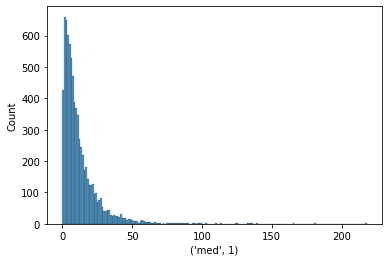

In [50]:
sns.histplot(why[('med',1)])

In [51]:
why

hh_person_id     med                                               \
WHYTRP90                    1       2       3       4   5        6       8   
0          30000012-1  7.9525   4.291     NaN     NaN NaN      NaN  48.879   
1          30000082-1  1.7520     NaN     NaN  1.8925 NaN      NaN     NaN   
2          30000082-2     NaN  45.341  2.1360     NaN NaN      NaN     NaN   
3          30000380-2  1.1815     NaN  2.2100     NaN NaN   1.9610     NaN   
4          30000434-1     NaN   0.168  0.2730     NaN NaN      NaN     NaN   
...               ...     ...     ...     ...     ...  ..      ...     ...   
19159      40793808-1     NaN     NaN     NaN     NaN NaN      NaN     NaN   
19160      40793808-2     NaN     NaN  2.2430  4.4740 NaN      NaN     NaN   
19161      40793974-1     NaN     NaN  6.6095     NaN NaN      NaN   5.018   
19162      40794020-1     NaN     NaN  5.2660  0.8360 NaN      NaN     NaN   
19163      40794020-2     NaN     NaN  5.3020     NaN NaN  18.7105     NaN   

                              
WHYTRP90       10     11  99  
0          2.2270    NaN NaN  
1          1.4320    NaN NaN  
2         88.5810    NaN NaN  
3             NaN    NaN NaN  
4             NaN    NaN NaN  
...           ...    ...  ..  
19159      3.4890  3.748 NaN  
19160      1.8145    NaN NaN  
19161      3.6370    NaN NaN  
19162         NaN    NaN NaN  
19163         NaN    NaN NaN  

[19164 rows x 11 columns]

In [52]:
why_col = why.columns

In [53]:
new  = pd.DataFrame()
for i in range(1, len(why.columns)):
    new[why_col[i]] = ~np.isnan(why.iloc[:,i])

In [54]:
chart_data = new.stack().reset_index()
chart_data

,level_0,level_1,0
0,0,"(med, 1)",True
1,0,"(med, 2)",True
2,0,"(med, 3)",False
3,0,"(med, 4)",False
4,0,"(med, 5)",False
...,...,...,...
191635,19163,"(med, 6)",True
191636,19163,"(med, 8)",False
191637,19163,"(med, 10)",False
191638,19163,"(med, 11)",False


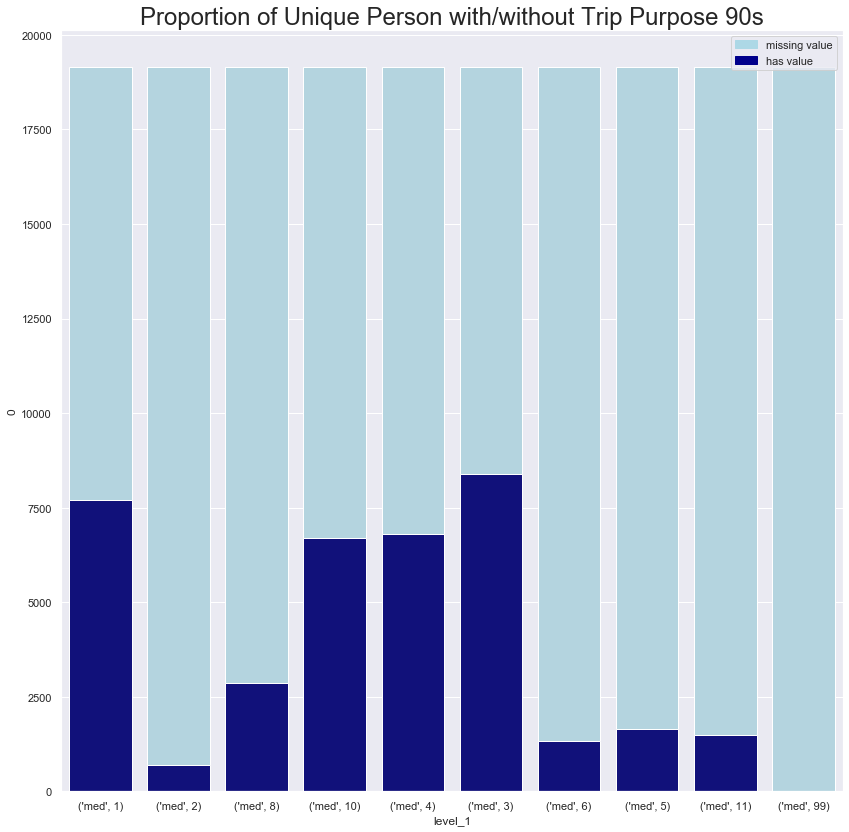

In [55]:
import matplotlib.patches as mpatches

sns.set(style="darkgrid")
plt.figure(figsize=(14, 14))

full_data = chart_data.groupby('level_1')[0].count().reset_index()

bar1= sns.barplot(data = full_data, x = "level_1", y = 0, color = 'lightblue')

has_value = chart_data[chart_data[0]==True]

bar2 = sns.barplot(data = has_value, estimator = sum, ci = None, x = "level_1", y = 0, color = 'darkblue')

bottom_bar = mpatches.Patch(color = 'darkblue', label = 'has value')
top_bar = mpatches.Patch(color = 'lightblue', label = 'missing value')

plt.title('Proportion of Unique Person with/without Trip Purpose 90s', fontsize = 24)
plt.legend(handles = [top_bar, bottom_bar])
plt.show()

## Instead use feature cross of most common reason x dist cat for that reason

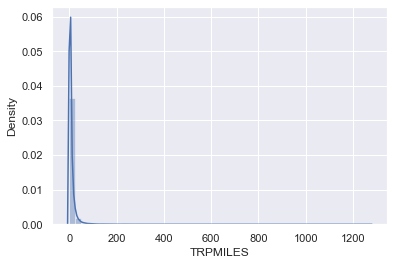

In [56]:
sns.distplot(ny_trip['TRPMILES'])

In [45]:
ny_trip[ny_trip['TRPMILES']> 200]

,HOUSEID,PERSONID,TRAVDAY,TRPMILES,TRPHHVEH,TRPTRANS,WHYTRP1S,WHYTRP90,TRVLCMIN,TRWAITTM
6354,30007462,1,2,386.648,1,3,1,8,440,-1
17581,30020018,1,4,307.460,1,5,1,10,365,-1
18764,30021241,1,5,306.353,1,3,40,3,335,-1
20651,30023489,1,7,260.981,1,4,50,8,305,-1
28590,30032194,1,1,283.949,1,3,1,11,245,-1
...,...,...,...,...,...,...,...,...,...,...
876364,40703779,1,6,286.143,1,3,50,8,185,-1
890231,40729376,1,5,309.981,1,3,50,10,287,-1
894684,40737760,2,1,207.956,1,3,10,2,240,-1
896928,40742011,1,1,228.669,1,6,1,11,270,-1


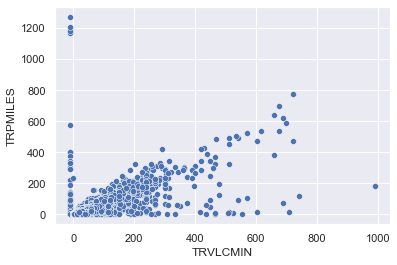

In [58]:
sns.scatterplot(data = ny_trip, x='TRVLCMIN', y = 'TRPMILES')

In [59]:
ny_trip[(ny_trip['TRVLCMIN']<100) & (ny_trip['TRPMILES']>100)]

,HOUSEID,PERSONID,TRAVDAY,TRPMILES,TRPHHVEH,TRPTRANS,WHYTRP1S,WHYTRP90,TRVLCMIN,TRWAITTM,hh_person_id
38630,30042582,1,2,224.420,1,4,40,3,-9,-1,30042582-1
38631,30042582,1,2,222.529,1,4,40,3,-9,-1,30042582-1
52906,30058065,2,2,137.565,1,3,40,3,95,-1,30058065-2
83867,30092515,2,5,127.756,2,6,1,2,99,-1,30092515-2
96763,30106948,2,1,231.503,1,8,1,10,0,-1,30106948-2
147991,30163514,2,5,112.172,1,6,40,3,98,-1,30163514-2
218705,30241673,1,3,403.456,1,4,40,3,-9,-1,30241673-1
218707,30241673,1,3,403.585,1,4,1,3,-9,-1,30241673-1
218708,30241673,1,3,402.629,1,4,50,10,-9,-1,30241673-1
218709,30241673,1,3,402.482,1,4,1,10,-9,-1,30241673-1


In [60]:
print(str(sum(ny_trip['TRVLCMIN']<=0)), ' trips missing TRVLCMIN info so will just remove since only ',str(sum(ny_trip['TRVLCMIN']<=0)/len(ny_trip)*100),"%")

72  trips missing TRVLCMIN info so will just remove since only  0.0958887690279276 %


In [46]:
ny_trip = ny_trip[ny_trip['TRVLCMIN']>0]

In [62]:
#bin distances to 5 groups (qcut)

ny_trip['trip distance bins'] = pd.qcut(ny_trip['TRPMILES'],5)

In [63]:
ny_trip.groupby('hh_person_id').agg({'WHYTRP90':pd.Series.mode})


# NEED HELP HERE WANT TO GET THE MODE WHY and then the MODE distance for the respective WHY for that person 
# e.g. Person A - work - 100 mile
#      Person B - school - 1 mile
#      Person C - work - 10 mile

,WHYTRP90
hh_person_id,
30000012-1,10
30000082-1,"[1, 4]"
30000082-2,"[2, 3, 10]"
30000380-2,"[3, 6]"
30000434-1,3
...,...
40793808-1,"[10, 11]"
40793808-2,3
40793974-1,10


In [64]:
## For Trip To me only the above feature cross or if want to do like urbanness of dest can also take via similiar approach e.g. the urbaness of the most common why

In [50]:
ny_trip_count = ny_trip[['HOUSEID','PERSONID','hh_person_id']].groupby(['HOUSEID','PERSONID']).agg('count').reset_index().rename(columns = {'hh_person_id':'n_trips'})

In [51]:
ny_trip_count.head()

,HOUSEID,PERSONID,n_trips
0,30000012,1,9
1,30000082,1,5
2,30000082,2,3
3,30000380,2,8
4,30000434,1,4


## 3. People

In [52]:
[c for c in person]

['HOUSEID',
 'PERSONID',
 'R_AGE',
 'EDUC',
 'R_HISP',
 'R_RELAT',
 'R_SEX',
 'R_RACE',
 'PRMACT',
 'PAYPROF',
 'GT1JBLWK',
 'WRK_HOME',
 'WKFTPT',
 'WRKTRANS',
 'LSTTRDAY17',
 'OCCAT',
 'SCHTYP',
 'NWALKTRP',
 'WALK4EX',
 'NBIKETRP',
 'BIKE4EX',
 'BIKESHARE',
 'PTUSED',
 'MCUSED',
 'CARSHARE',
 'RIDESHARE',
 'CARRODE',
 'TIMETOWK',
 'NOCONG',
 'PUBTIME',
 'WRKTIME',
 'WKRMHM',
 'FLEXTIME',
 'WKFMHMXX',
 'SCHTRN1',
 'SCHTRN2',
 'DELIVER',
 'MEDCOND',
 'MEDCOND6',
 'HEALTH',
 'PHYACT',
 'VPACT',
 'LPACT',
 'BORNINUS',
 'YRTOUS',
 'YEARMILE',
 'PROXY',
 'WHOPROXY',
 'USEPUBTR',
 'SAMEPLC',
 'W_NONE',
 'W_CANE',
 'W_WLKR',
 'W_WHCANE',
 'W_DOG',
 'W_CRUTCH',
 'W_SCOOTR',
 'W_CHAIR',
 'W_MTRCHR',
 'WORKER',
 'DIARY',
 'OUTCNTRY',
 'FRSTHM17',
 'CNTTDTR',
 'GCDWORK',
 'WKSTFIPS',
 'DRIVER',
 'OUTOFTWN',
 'DISTTOWK17',
 'DISTTOSC17',
 'R_AGE_IMP',
 'R_SEX_IMP',
 'ALT_16',
 'ALT_23',
 'ALT_45',
 'WALK_DEF',
 'WALK_GKQ',
 'BIKE_DFR',
 'BIKE_GKP',
 'CONDTRAV',
 'CONDRIDE',
 'CONDNIGH',
 'CONDRI

In [53]:
# Fitlering NY Drivers only

nyorker = person[(person['HOUSEID'].isin(ny['HOUSEID'])) & (person['DRIVER']==1)]

In [54]:
nyorker['hh_person_id'] = nyorker['HOUSEID'].astype('str') + '-' + nyorker['PERSONID'].astype('str')

In [55]:
[c for c in person]

['HOUSEID',
 'PERSONID',
 'R_AGE',
 'EDUC',
 'R_HISP',
 'R_RELAT',
 'R_SEX',
 'R_RACE',
 'PRMACT',
 'PAYPROF',
 'GT1JBLWK',
 'WRK_HOME',
 'WKFTPT',
 'WRKTRANS',
 'LSTTRDAY17',
 'OCCAT',
 'SCHTYP',
 'NWALKTRP',
 'WALK4EX',
 'NBIKETRP',
 'BIKE4EX',
 'BIKESHARE',
 'PTUSED',
 'MCUSED',
 'CARSHARE',
 'RIDESHARE',
 'CARRODE',
 'TIMETOWK',
 'NOCONG',
 'PUBTIME',
 'WRKTIME',
 'WKRMHM',
 'FLEXTIME',
 'WKFMHMXX',
 'SCHTRN1',
 'SCHTRN2',
 'DELIVER',
 'MEDCOND',
 'MEDCOND6',
 'HEALTH',
 'PHYACT',
 'VPACT',
 'LPACT',
 'BORNINUS',
 'YRTOUS',
 'YEARMILE',
 'PROXY',
 'WHOPROXY',
 'USEPUBTR',
 'SAMEPLC',
 'W_NONE',
 'W_CANE',
 'W_WLKR',
 'W_WHCANE',
 'W_DOG',
 'W_CRUTCH',
 'W_SCOOTR',
 'W_CHAIR',
 'W_MTRCHR',
 'WORKER',
 'DIARY',
 'OUTCNTRY',
 'FRSTHM17',
 'CNTTDTR',
 'GCDWORK',
 'WKSTFIPS',
 'DRIVER',
 'OUTOFTWN',
 'DISTTOWK17',
 'DISTTOSC17',
 'R_AGE_IMP',
 'R_SEX_IMP',
 'ALT_16',
 'ALT_23',
 'ALT_45',
 'WALK_DEF',
 'WALK_GKQ',
 'BIKE_DFR',
 'BIKE_GKP',
 'CONDTRAV',
 'CONDRIDE',
 'CONDNIGH',
 'CONDRI

In [56]:
nyorker = nyorker[['HOUSEID','PERSONID','R_AGE','EDUC','R_RACE','R_SEX','WRK_HOME','WKFTPT','OCCAT','DRIVER']]

## Age

53 count of people with no age.  0.0002005797891263047 %. Prolly can remove
     counts  percentage
 65     795    2.847625
 64     739    2.647038
 60     732    2.621964
 62     730    2.614800
 63     706    2.528834
..      ...         ...
 86     100    0.358192
 87      99    0.354610
 88      74    0.265062
-7       45    0.161186
-8        8    0.028655

[76 rows x 2 columns]


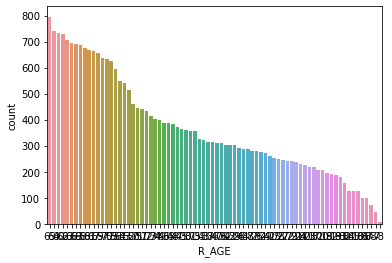

In [57]:
print(str(sum(nyorker['R_AGE']<0)), "count of people with no age. ",str(sum(nyorker['R_AGE']<0)/person.shape[0]),"%. Prolly can remove")
cat_col_prop(nyorker,'R_AGE')


     counts  percentage
 65     795    2.847625
 64     739    2.647038
 60     732    2.621964
 62     730    2.614800
 63     706    2.528834
..      ...         ...
 86     100    0.358192
 87      99    0.354610
 88      74    0.265062
-7       45    0.161186
-8        8    0.028655

[76 rows x 2 columns]

395 people below the age of 18 0.014148577978365212 %


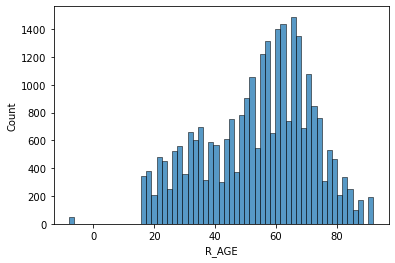

In [58]:
print(pd.concat([nyorker['R_AGE'].value_counts(),
          nyorker['R_AGE'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )
print('')
print(str(sum(nyorker['R_AGE']<18)), 'people below the age of 18', str(sum(nyorker['R_AGE']<18)/len(nyorker['R_AGE'])),"%")


sns.histplot(nyorker['R_AGE'])

# Interesting that a lot of the respondants are older but dont think need to change
# possibly something to do with the fact that the survey was done via landline calls??

## EDUC

    counts  percentage
 3    7758   27.788524
 5    7239   25.929508
 4    6198   22.200731
 2    5734   20.538721
 1     970    3.474461
-7      15    0.053729
-8       4    0.014328


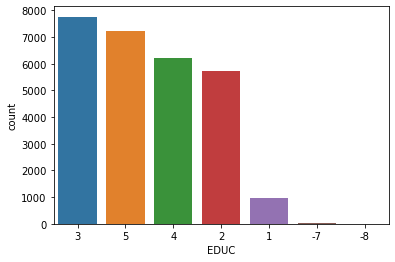

In [59]:
cat_col_prop(nyorker,'EDUC',)

     counts  percentage
 1    24875   91.184018
 3      750    2.749267
 2      712    2.609971
 6      436    1.598240
 97     279    1.022727
-7      132    0.483871
 4       66    0.241935
 5       19    0.069648
-8       11    0.040323


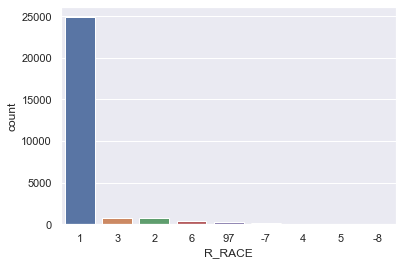

In [75]:
cat_col_prop(nyorker,'R_RACE')

# High proporition of white

    counts  percentage
 2   14483   51.876925
 1   13413   48.044273
-7      20    0.071638
-8       2    0.007164


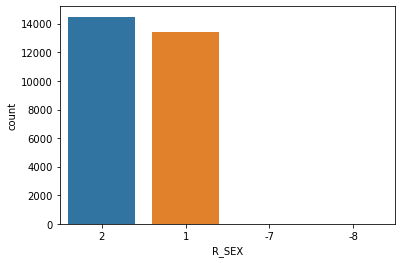

In [60]:
cat_col_prop(nyorker,'R_SEX')

    counts  percentage
 2   13710   49.108102
-1   11834   42.388423
 1    1733    6.207465
-9     640    2.292428
-7       1    0.003582
prolly split -1: not working, 2:No, 1: Yes


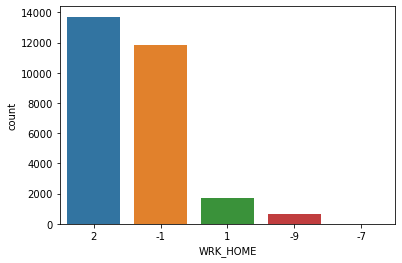

In [61]:
cat_col_prop(nyorker,'WRK_HOME')

print('prolly split -1: not working, 2:No, 1: Yes')

    counts  percentage
-1   12474   44.680851
 1   12047   43.151372
 2    3387   12.131958
-7       8    0.028655
-8       2    0.007164
similiar regarding the non workers 51%


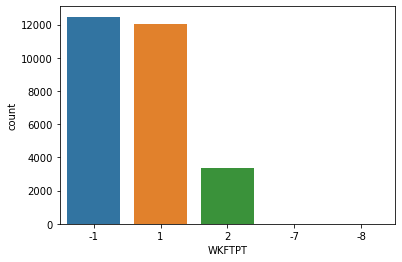

In [62]:
cat_col_prop(nyorker,'WKFTPT')

print('similiar regarding the non workers 51%')

     counts  percentage
-1    11834   42.388423
 4     8630   30.911956
 1     3185   11.408410
 3     1842    6.597894
 2     1761    6.307758
-9      640    2.292428
 97      18    0.064475
-8        5    0.017910
-7        3    0.010746
similiar not working


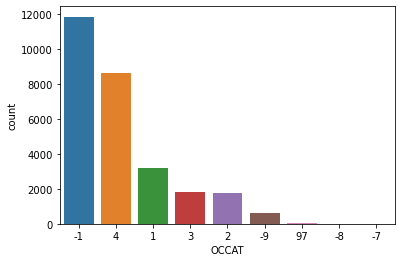

In [63]:
cat_col_prop(nyorker,'OCCAT')
print('similiar not working')

In [64]:
df = nyorker.merge(ny, how='left', left_on = 'HOUSEID', right_on = 'HOUSEID')


In [65]:
df = df.merge(ny_trip_count,how = 'left', left_on = ['HOUSEID','PERSONID'], right_on = ['HOUSEID','PERSONID'])

In [66]:
df = df[df['n_trips'].notna()] 
df.shape

(19256, 24)

## One Hot Encoding

In [67]:
df.dtypes

HOUSEID               int64
PERSONID              int64
R_AGE                 int64
EDUC                  int64
R_RACE                int64
R_SEX                 int64
WRK_HOME              int64
WKFTPT                int64
OCCAT                 int64
DRIVER                int64
HH_CBSA              object
HOMEOWN              object
HHSIZE               object
HHVEHCNT             object
HHFAMINC             object
NUMADLT_ratio        object
YOUNGCHILD_ratio     object
WRKCOUNT_ratio       object
MSASIZE               int64
URBAN                 int64
URBANSIZE             int64
URBRUR                int64
LIF_CYC               int64
n_trips             float64
dtype: object

In [69]:
to_obj = ['HOUSEID','PERSONID','EDUC','R_RACE','R_SEX','WRK_HOME','WKFTPT','OCCAT','DRIVER','MSASIZE','URBAN','URBANSIZE','URBRUR','LIF_CYC']

df[to_obj] = df[to_obj].astype(str)

df['n_trips'] = df['n_trips'].astype('int64')

In [70]:
df.drop(['HOUSEID','PERSONID'],axis=1,inplace = True)

In [71]:
one_hot_col = [c for c in df if df[c].dtypes == 'O' ]

In [72]:
pd.get_dummies(df[one_hot_col],prefix = one_hot_col)

,EDUC_-7,EDUC_-8,EDUC_1,EDUC_2,EDUC_3,EDUC_4,EDUC_5,R_RACE_-7,R_RACE_-8,R_RACE_1,...,LIF_CYC_1,LIF_CYC_10,LIF_CYC_2,LIF_CYC_3,LIF_CYC_4,LIF_CYC_5,LIF_CYC_6,LIF_CYC_7,LIF_CYC_8,LIF_CYC_9
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27912,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
27913,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
27914,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
27915,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
